<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Tarea 0</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Fransisco Mena</h3>
    <h3 align="center">Camilo Sanchez Bravo</h3>
    <h3 align="center">201673586-0</h3>
    <h3 align="center">Gabriel Vergara Donoso</h3>
    <h3 align="center">201673605-0</h3>
    <h3 align="center">Septiembre 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

<a id="primero"></a>
## 1. Perceptrón a mano

a) Escriba una función que calcule el valor de salida (output) del modelo  𝑓(𝑥)  para un patrón de entrada  𝑥  a través de los pesos  𝑤  del modelo. Decida si incluir los bias dentro de  𝑤  o manejarlos de manera separada.

 Implementación de la función f(x) en Python.

    Los bias se incluirán dentro de W, vector que contiene los pesos w. 
    Inputs:   
        X: vector que contiene los x.       
        W: vector que contiene los pesos w, donde w(i) corresponde al peso para el atributo x(i)    
    Output: Clase (1 o -1) que se calcula para X.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(X,W):
    y = np.dot(X,W) #producto punto entre X y W
    if (y >= 0):
        return 1
    else:
        return -1

b) Escriba una función que implemente el clásico algoritmo del Perceptrón para un problema binario que permita entrenarlo en un conjunto de datos de tamaño  𝑁 , leídos de manera online (uno a uno). Recordar la decisión anterior sobre los bias.

Implementación de perceptron en Python:

    Se implementó la función del perceptron on-line presentado en el paper, el cual ajusta los pesos de los atributos cuando clasifica incorrectamente. Además conserva un vector de pesos extra que guarda el mejor caso hasta el momento (que tienes mas datos seguidos clasificados correctamente), el cual es el usado para probar y graficar la precisión.
    Inputs:
        Xs: Matriz nxN, donde n son la cantidad de ejemplos y N la cantidad de atributos más bias. Esto por comodidad ya que la función usa variables locales, aún así aprende por cada ejemplo.
        Y: Vector con la clasificación del ejemplo i.
    Output: Vector con los pesos que mejor clasificó con los ejemplos dados, listas con la cantidad de datos vistos hasta el momento y la precision en cada momento

In [2]:
def perceptron(Xs,Y):
    N = len(Xs[0]) ##cantidad de atributos
    pi = np.zeros(N) ##vector pi
    W = np.zeros(N) #vector W a retornar
    run_pi = run_w = i =0 #casos consecutivos correctos por pi o w, e i como contador
    
    #sgte 3 variables usadas para graficar
    accu = []
    datos = []
    cantidad = len(Y)
    
    for X in Xs: #aprende por caso
        y = f(X,pi) #clasificacion de X con los pesos pi
        if(y == Y[i]): #correcta clasificacion
            run_pi += 1
            if(run_pi > run_w): #reemplaza el mejor caso hasta el momento por el ultimo mejor
                W = np.copy(pi)
                run_w = run_pi
        else: #clasificacion incorrecta
            pi = pi + 0.25*(X*Y[i]) #ajusta el vector pi 
            run_pi = 0
        i += 1
        
        #usado para graficar posteriormente
        datos.append(i)
        j = 0
        correctas = 0
        while(j<cantidad):
            if(Y[j]==f(Xs[j],W)):
                correctas += 1.0
            j += 1
        accu.append(correctas/cantidad)
    
    return W,datos, accu
    
    

c) Demuestre que lo implementado funciona en un problema real de clasificación. Para esto utilice el dataset Breast cancer wisconsin, disponible a través de la librería sklearn, el cual corresponde a la detección de cancer mamario a través de características relevantes (numéricas continuas) de un examen realizado, como por ejemplo la textura, simetría y tamaño de una masa mamaria. Estas características deben combinarse linealmente para la detección del cancer.

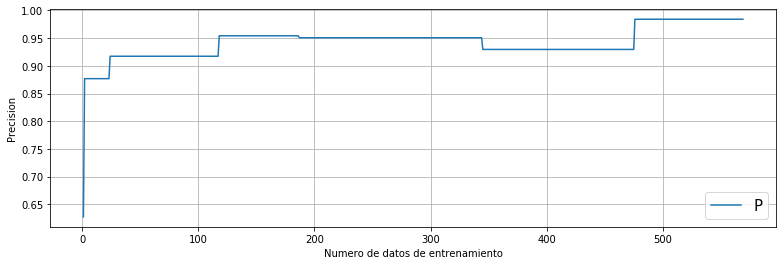

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
N,m=X_train.shape
X_train = np.c_[X_train, np.ones(N)]
i = 0
cantidad = len(y_train)
while(i<cantidad): #cambiar las clases 0 a -1 (necesarias en el perceptron)
    if (y_train[i]==0):
        y_train[i] = -1
    i +=1

pesos, datos, accu = perceptron(X_train, y_train)
plt.figure(figsize=(13,4))
plt.grid()
plt.xlabel("Numero de datos de entrenamiento")
plt.ylabel("Precision")
grafico=plt.plot(datos,accu)
plt.legend('Perceptron',
prop = {'size':15}, loc = 'lower right')
plt.show()


Habiendo aprendido con mas de 500 casos de entrenamiento, se puede observar en el gráfico su alta precisión que llega con estos al probarlos aunque con esto hay que tener cuidado porque al ser los mismo datos de entrenamiento puede ser señal de overffiting. Aún así, se observa que antes de llegar a los 100 casos de entrenamiento ya tiene una alta precisión con los datos que aún no se ha visto, por lo que puede ser correcto concluir que la diferencia entre atributos de las dos clases está bien diferenciada y son significativas para clasificar.
En cuanto a la forma de gráfico, se observa claramente que hay tramos donde la precisión es constante debido a que se usa el mejor vector de pesos hasta al momento, lo que también lleva a que hayan variaciones de precision abruptas (una recta vertical) cuando hay cambio de pesos.

d) Escriba una función que implemente el **Forgetrón**  con una memoria de tamaño $K$ y la función de kernel como el producto interno (*inner-product*), esto es $<a,b> = \sum_i a_i \cdot b_i$.

Implementación del Forgetron mostrado en el paper de manera simplificada, donde el factor de ajuste para cada dato guardado varía de un factor constante (0.1).

    Inputs:
        Xs: Matriz con los casos de entrenamiento (igual al perceptron)
        Y: Vector con la clasificación del dato i.
        K: Tamaño de memoria maxima 
    Output: Vector con los pesos para cada atributo, listas de los datos vistos hasta el momento y su precisión

In [4]:
def Forgetron(Xs,Y,K):
    N = len(Xs[0])
    f1 = np.zeros(N) #vector de pesos inicializados en 0s
    I1 = [] #memoria del algoritmo
    factores = np.zeros(K)
    Ys = [] #los 'y' de los datos que fallaron
    fallas = 0 
    pos = 0 #guarda la posicion actual en la memoria de los datos guardados
    i = 0 
    accu = []
    datos = []
    cantidad = len(Y)
    for X in Xs:
        if ((f(X,f1)*Y[i])<0): #si falla la prediccion
            #fallas += 1
            if (pos>=K): #por la memoria limitada
                pos = 0
            #I1[pos] = X
            if(fallas >= K): 
                Ys[pos] = Y[i]
                I1[pos] = X
                factores = factores*0.1
            else:
                Ys.append(Y[i])
                I1.append(X)
            factores[pos] = 1 #nuevo error
            pos += 1
            fallas +=1
        #ft = np.zeros(N)
        for j in list(range(len(Ys))):
            f1 = f1 + factores[j]*Ys[j]*I1[j]
        #f1 = np.copy(ft)
        i += 1
        datos.append(i)
        j = 0
        correctas = 0
        while(j<cantidad):
            if(Y[j]==f(Xs[j],f1)):
                correctas += 1.0
            j += 1
        accu.append(correctas/cantidad)
    return f1,datos,accu

e) Vuelva a realizar el item c) para el **Forgetrón** con un $K=10$ y compare los resultados.

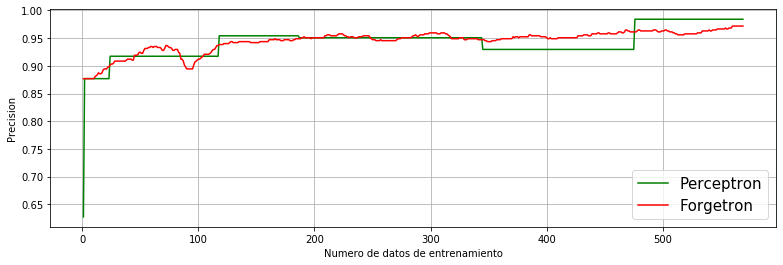

In [5]:
pesos, datosf, accuf= Forgetron(X_train, y_train, 10)
plt.figure(figsize=(13,4))
plt.grid()

plt.xlabel("Numero de datos de entrenamiento")
plt.ylabel("Precision")
plt.plot(datos, accu, 'g-', datosf, accuf, 'r-')
plt.legend(('Perceptron', 'Forgetron'),
prop = {'size':15}, loc = 'lower right')
plt.show()

De forma similar que el Perceptron, el Forgetron también alcanza una alta precisión rapidamente con los casos de entrenamiento. Aunque se observa que las variaciones entre las precisiones son diferentes, donde el perceptron son abruptas y se mantienen hasta un mejor caso, el Forgetron varía de manera más suave y practicamente no existe trazos donde es constante debido que en cada iteración se ajusta nuevamente el vector pesos.
Una ventaja que se observa del Forgetron es que pareciera llegar a una mejor precisión con menos casos, debido a que ajusta en cada iteración los pesos y no solo cuando hay un mejor caso como en el Perceptron.


### ¿Qué sucede al variar la función objetivo del problema? 

f) Escriba una función que compute la función sigmoidal para una entrada  𝜉  cualquiera. Tenga cuidado con los límites de números que puede trabajar python (por ejemplo  exp800→+∞ ). Se aconseja acotar/truncar los valores que entran a la función para que la operación se pueda realizar. Además escriba una función que calcule la salida del nuevo modelo  𝑔(𝑥;𝑤,𝑏)  con esta función sigmoidal.

In [69]:
import math

def sigmoid(x):
    if (x>36):
        x=36
    if (x < -709):
        x = -709
    return 1 / (1 + np.exp(-x))

def f2(X,W):
    y = np.dot(X,W) #producto punto entre X y W
    if (sigmoid(y) >= 0.5):
        return 1
    else:
        return 0

g) Escriba una función que calcule la función de pérdida descrita anteriormente para un dato  𝑥(𝑖) , utilizando  𝑔(𝑥(𝑖);𝑤,𝑏) . Tenga cuidado con los límites del logaritmo (recordad que  log0→+∞ ).

In [81]:
def bce(y,X,W):#y=f2(x,W)
    interno = np.dot(X,W)
    if(y==1):
        return -np.log(sigmoid(interno))
    else:
        return -np.log(1-sigmoid(interno))

h) Escriba una función que calcule el gradiente (derivada) de la función de pérdida anterior con respecto a los pesos del modelo  𝑤 . Se recomienda derivarla analíticamente y luego escribirla. Recuerde el uso de la regla de la cadena.

In [47]:
def gradient(y,X,W):#sigmoid'=sigmoid*(1-sigmoid)
    aux=sigmoid(np.dot(X,W))
    return ( -y/aux + (1-y)/(1-aux) )*(aux)*(1-aux)*X

i) Realice una modificación al algoritmo implementado en b) (Perceptrón) para que se adapte a la función objetivo binary cross entropy implementada, para ésto haga uso del algoritmo de optimización SGD (Stochastic Gradient Descend) con tasa de aprendizaje  𝜂∈[0,1] .

In [52]:


def perceptron(Xs,Y):
    N = len(Xs[0]) ##cantidad de atributos
    pi = np.zeros(N) ##vector pi
    W = np.zeros(N) #vector W a retornar
    run_pi = run_w = i =0 #casos consecutivos correctos por pi o w, e i como contador
    accu = []
    loss =[]
    datos = []
    cantidad = len(Y)
    for X in Xs: #aprende por caso
        y = f2(X,pi) #clasificacion de X con los pesos pi
        #if(y == Y[i]): 
         #   
          #  run_pi += 1
           # if(run_pi > run_w): #
            #    W = np.copy(pi)
             #   run_w = run_pi
              #  run_w = run_pi
        #else:
         #   run_pi = 0
        pi = pi - 0.1*gradient(Y[i],X,pi)
        datos.append(i)
        j = 0
        correctas = 0
        losss= 0
        while(j<cantidad):
            if(Y[j]==f(Xs[j],pi)):
                correctas += 1.0
            j += 1
        loss.append(bce(y,X,pi))
        accu.append(correctas/cantidad)
        i+=1
    return pi, datos, accu, loss
    
    

j) Vuelva a realizar el item c) con esta modificación, además grafique la función de pérdida en el transcurso del entrenamiento. Compare los resultados.

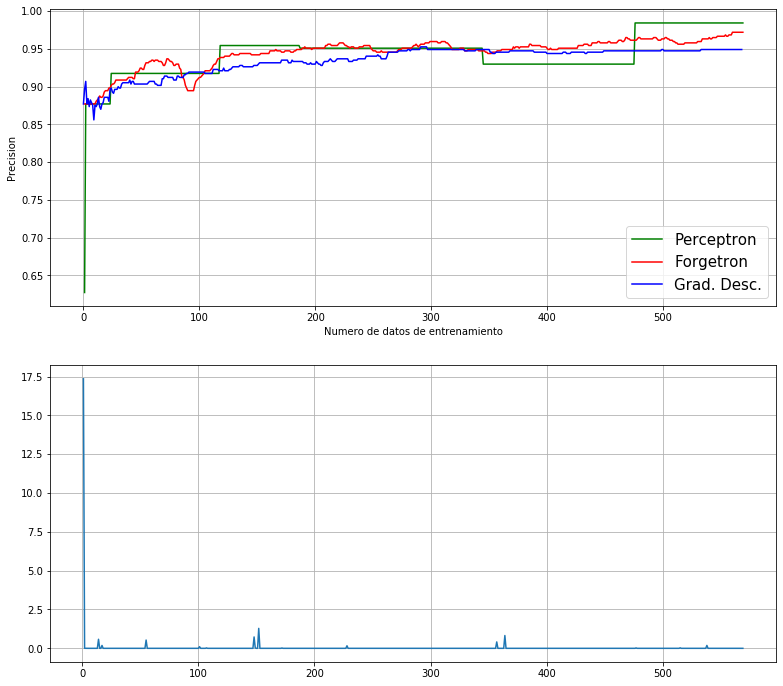

In [82]:
while(i<cantidad): #cambiar los -1 a 0,
    if (y_train[i]==-1):
        y_train[i] = 0
    i +=1

pesos,datoss, accus, loss = perceptron(X_train, y_train)

plt.figure(figsize=(13,12))
plt.subplot(211)
plt.grid()
plt.xlabel("Numero de datos de entrenamiento")
plt.ylabel("Precision")
plt.plot(datos, accu, 'g-', datos, accuf, 'r-', datoss, accus, 'b-')
plt.legend(('Perceptron', 'Forgetron', 'Grad. Desc.'),
prop = {'size':15}, loc = 'lower right')
plt.subplot(212)
plt.grid()
plt.plot(datos,loss)
plt.show()